<a href="https://colab.research.google.com/github/thekaif7/exploratory_data_analysis/blob/main/EDA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Statistical profile of numberic feature/columns

In [ ]:
mpg.mpg.min() , mpg.mpg.max()

(9.0, 46.6)

Descriptive Statistic

In [4]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


Get Information of data types of column which equivalent to desc in sql

In [16]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


using include exclude parameter for object(string) field ⌨



In [5]:
mpg.describe(include=['O'])

,origin,name
count,398,398
unique,3,305
top,usa,ford pinto
freq,249,6


Count group by column

In [12]:
mpg.origin.value_counts() # same as select origin, count(*) from data group by origin;

usa       249
japan      79
europe     70
Name: origin, dtype: int64

count group by multiple columns


In [13]:
mpg[['origin','name']].value_counts()

origin  name                       
usa     ford pinto                     6
        ford maverick                  5
        amc matador                    5
japan   toyota corolla                 5
        toyota corona                  4
                                      ..
        toyota starlet                 1
        toyota tercel                  1
        toyouta corona mark ii (sw)    1
usa     amc ambassador brougham        1
        pontiac ventura sj             1
Length: 305, dtype: int64

Checking NULL/NA percentage 

In [15]:
mpg.isna().sum() / len(mpg) * 100

mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      1.507538
weight          0.000000
acceleration    0.000000
model_year      0.000000
origin          0.000000
name            0.000000
dtype: float64

In [17]:
mpg.isna().sum().sum() # total na in dataset

6

Max and Min cyclinders value in usa origin

In [21]:
mpg[mpg.origin == 'usa'].cylinders.min(), mpg[mpg.origin == 'usa'].cylinders.max()

(4, 8)

Average horsepower in usa during 80's models

In [31]:
mpg[(mpg.origin == 'usa') & (mpg.model_year ==80)].horsepower.mean() # note here bitwise logical operator with each condition is in bracket first

88.83333333333333

Filling NA and Drop NA

In [32]:
mpg[(mpg.origin == 'usa') & (mpg.model_year == 80)].horsepower.fillna(0).mean()

76.14285714285714

In [33]:
mpg[(mpg.origin == 'usa') & (mpg.model_year == 80)].horsepower.dropna().mean()

88.83333333333333

Average no. of cylinders over all origin and over all year

In [36]:
# mpg.groupby(['origin','model_year']).mean().cylinders
mpg.groupby(['origin','model_year']).cylinders.mean()

origin  model_year
europe  70            4.000000
        71            4.000000
        72            4.000000
        73            4.000000
        74            4.000000
        75            4.000000
        76            4.250000
        77            4.000000
        78            4.833333
        79            4.250000
        80            4.111111
        81            4.500000
        82            4.000000
japan   70            4.000000
        71            4.000000
        72            3.800000
        73            4.250000
        74            4.000000
        75            4.000000
        76            4.500000
        77            4.166667
        78            4.000000
        79            4.000000
        80            4.076923
        81            4.333333
        82            4.000000
usa     70            7.636364
        71            6.200000
        72            6.888889
        73            7.241379
        74            6.266667
        75          

Reshaping making more readable

In [37]:
mpg.groupby(['model_year','origin']).cylinders.mean()

model_year  origin
70          europe    4.000000
            japan     4.000000
            usa       7.636364
71          europe    4.000000
            japan     4.000000
            usa       6.200000
72          europe    4.000000
            japan     3.800000
            usa       6.888889
73          europe    4.000000
            japan     4.250000
            usa       7.241379
74          europe    4.000000
            japan     4.000000
            usa       6.266667
75          europe    4.000000
            japan     4.000000
            usa       6.400000
76          europe    4.250000
            japan     4.500000
            usa       6.363636
77          europe    4.000000
            japan     4.166667
            usa       6.222222
78          europe    4.833333
            japan     4.000000
            usa       6.000000
79          europe    4.250000
            japan     4.000000
            usa       6.260870
80          europe    4.111111
            japan   

In [38]:
mpg.groupby(['model_year','origin']).cylinders.mean().reset_index() # convert into dataframe index will row num

,model_year,origin,cylinders
0,70,europe,4.000000
1,70,japan,4.000000
2,70,usa,7.636364
3,71,europe,4.000000
4,71,japan,4.000000
5,71,usa,6.200000
6,72,europe,4.000000
7,72,japan,3.800000
8,72,usa,6.888889
9,73,europe,4.000000


In [44]:
mpg.groupby(['model_year','origin']).cylinders.mean().unstack() # origin has only 3 distinct value it will unstack data make origin value as column

origin,europe,japan,usa
model_year,,,
70,4.000000,4.000000,7.636364
71,4.000000,4.000000,6.200000
72,4.000000,3.800000,6.888889
73,4.000000,4.250000,7.241379
74,4.000000,4.000000,6.266667
75,4.000000,4.000000,6.400000
76,4.250000,4.500000,6.363636
77,4.000000,4.166667,6.222222
78,4.833333,4.000000,6.000000


Unstack : It convert group by col value into col and makes more readable 

In [42]:
mpg.groupby(['model_year','origin']).cylinders.mean().unstack(level = 0) 
# level = 0 unstack by model_year as it is first col in group by level = 1 usntack by origin 

model_year,70,71,72,73,74,75,76,77,78,79,80,81,82
origin,,,,,,,,,,,,,
europe,4.000000,4.0,4.000000,4.000000,4.000000,4.0,4.250000,4.000000,4.833333,4.25000,4.111111,4.500000,4.0
japan,4.000000,4.0,3.800000,4.250000,4.000000,4.0,4.500000,4.166667,4.000000,4.00000,4.076923,4.333333,4.0
usa,7.636364,6.2,6.888889,7.241379,6.266667,6.4,6.363636,6.222222,6.000000,6.26087,4.285714,4.923077,4.3


In [43]:
# Rows giving ascending value is more Recommended 
# because It can used in plot visualization
mpg.groupby(['model_year','origin']).cylinders.mean().unstack(level = 1) 

origin,europe,japan,usa
model_year,,,
70,4.000000,4.000000,7.636364
71,4.000000,4.000000,6.200000
72,4.000000,3.800000,6.888889
73,4.000000,4.250000,7.241379
74,4.000000,4.000000,6.266667
75,4.000000,4.000000,6.400000
76,4.250000,4.500000,6.363636
77,4.000000,4.166667,6.222222
78,4.833333,4.000000,6.000000


Plot : Dataframe has plot function which is by default line ploting 

<Axes: xlabel='model_year'>

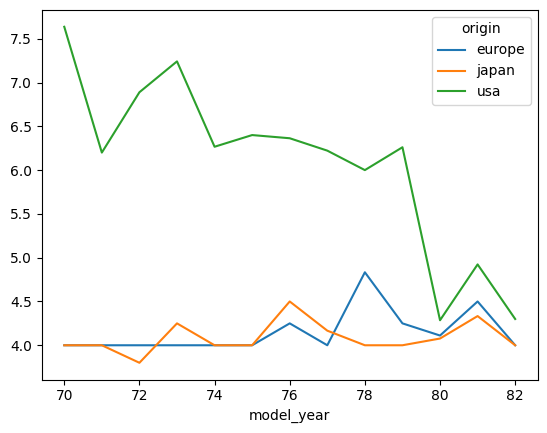

In [45]:
mpg.groupby(['model_year','origin']).cylinders.mean().unstack(level = 1).plot()